#Importando las librerías necesarias

In [1]:
!pip install matplotlib=="3.5.2"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer

# Montar Google Drive para lectura de archivo

In [3]:
from google.colab import drive # La usamos para montar nuestra unidad de Google Drive
drive.mount('/content/drive') # Montamos nuestra unidad de Google Drive

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data Science - Icaro/Sprints/train.csv', na_values = ('?','')) #para discriminar los valores nulos

# Análisis Exploratorio del dataset

In [5]:
df.head()

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
0,24466,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,<=50K,24451
1,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,>50K,985
2,30250,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,>50K,30229
3,7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,7107
4,27656,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K,27639


###***Variable Objetivo : Income - Problema de Clasificación**

Formateo de la variable objetivo a valores numéricos

In [6]:
df.income.nunique()

2

In [8]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [9]:
df['income.num'] = pd.factorize(df.income)[0]

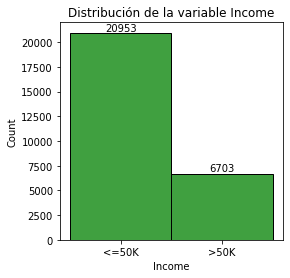

In [10]:
fig, ax = plt.subplots(figsize=(4,4))
y = sns.histplot(data=df.income, color = "green")
y.set(xlabel='Income')
y.bar_label(y.containers[0])
plt.title("Distribución de la variable Income")
plt.show()

##Tamaño del dataset

In [11]:
df.shape

(27656, 17)

##Analizando las columnas del dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27656 entries, 0 to 27655
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           27656 non-null  int64 
 1   age             27656 non-null  int64 
 2   workclass       26117 non-null  object
 3   education       27656 non-null  object
 4   education.num   27656 non-null  int64 
 5   marital.status  27656 non-null  object
 6   occupation      26110 non-null  object
 7   relationship    27656 non-null  object
 8   race            27656 non-null  object
 9   sex             27656 non-null  object
 10  capital.gain    27656 non-null  int64 
 11  capital.loss    27656 non-null  int64 
 12  hours.per.week  27656 non-null  int64 
 13  native.country  27152 non-null  object
 14  income          27656 non-null  object
 15  ID              27656 non-null  int64 
 16  income.num      27656 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 3.6+ MB


##Tipo de Datos

In [13]:
df.dtypes

index              int64
age                int64
workclass         object
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
ID                 int64
income.num         int64
dtype: object

##Valores Nulos

In [14]:
df.isna().sum()

index                0
age                  0
workclass         1539
education            0
education.num        0
marital.status       0
occupation        1546
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     504
income               0
ID                   0
income.num           0
dtype: int64

In [15]:
df.describe()

,index,age,education.num,capital.gain,capital.loss,hours.per.week,ID,income.num
count,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000
mean,16274.894851,38.610356,10.093506,1099.991503,88.284387,40.446666,16267.565736,0.242371
std,9410.041750,13.659928,2.566083,7487.323462,405.821328,12.369212,9403.092602,0.428525
min,0.000000,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,8104.750000,28.000000,9.000000,0.000000,0.000000,40.000000,8104.750000,0.000000
50%,16296.000000,37.000000,10.000000,0.000000,0.000000,40.000000,16291.000000,0.000000
75%,24431.250000,48.000000,12.000000,0.000000,0.000000,45.000000,24416.250000,0.000000
max,32559.000000,90.000000,16.000000,99999.000000,4356.000000,99.000000,32535.000000,1.000000


##Variables Categóricas


*   workclass
*   education
*   marital.status
*   occupation
*   relationship
*   race
*   sex
*   native.country
*   income




##Variables Numéricas


*   index
*   age
*   education.num
*   capital.gain
*   capital.loss
*   hours.per.week
*   income.num
*   ID



##Análisis Variables Categóricas

Se busca la relación entre los valores nulos y las demás categorías de datos para definir la estrategia a utilizar.

In [16]:
df_filtered = df[pd.isna(df['workclass'])]

-          education – The highest level of education achieved for that individual. This is nominal attribute. The ordered levels of the attributes: Preschool < 1st-4th < 5th-6th < 7th-8th < 9th < 10th < 11th < 12th < HS-grad < Prof-school < Assoc-acdm < Assoc-voc < Some-college < Bachelors < Masters < Doctorate.

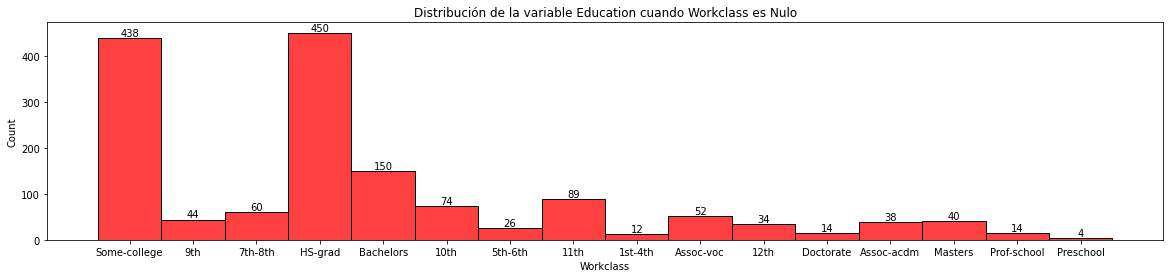

In [17]:
fig, ax = plt.subplots(figsize=(20,4))
y = sns.histplot(data=df_filtered.education, color = "red")
#y.set_style('darkgrid')
y.set(xlabel='Workclass')
y.bar_label(y.containers[0])
plt.title("Distribución de la variable Education cuando Workclass es Nulo")
plt.show()

###Workclass 💼



In [18]:
df.workclass.unique()

array(['Local-gov', 'Private', 'Federal-gov', 'Self-emp-not-inc', nan,
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

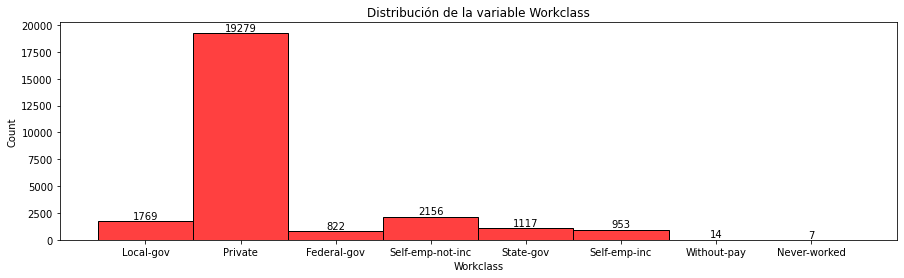

In [19]:
fig, ax = plt.subplots(figsize=(15,4))
y = sns.histplot(data=df.workclass, color = "red")
y.set(xlabel='Workclass')
y.bar_label(y.containers[0])
plt.title("Distribución de la variable Workclass")
plt.show()

####Reemplazamos valores nulos de "workclass" por la moda

 ✅ Vamos a instanciar nuestro objeto Simple Imputer de Sklearn para imputar bmi con la mediana y smoking status con la moda.

In [20]:
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

✅ Entrenamos nuestros imputadores, para esto usamos el método FIT.

In [21]:
imputer_mode.fit(df[['workclass']])

SimpleImputer(strategy='most_frequent')

✅ Ahora vamos a usar nuestros imputers en nuestras columnas, para esto usamos el método TRANSFORM.

In [22]:
df['workclass'] = imputer_mode.transform(df[['workclass']])

✅ Ahora revisemos si tenemos Nans



In [23]:
df.isna().sum()

index                0
age                  0
workclass            0
education            0
education.num        0
marital.status       0
occupation        1546
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     504
income               0
ID                   0
income.num           0
dtype: int64

###Occupation 👨‍💼

In [24]:
df.occupation.nunique()

14

In [25]:
df.occupation.unique()

array(['Protective-serv', 'Exec-managerial', 'Craft-repair',
       'Prof-specialty', 'Tech-support', 'Other-service',
       'Transport-moving', 'Adm-clerical', 'Farming-fishing',
       'Handlers-cleaners', nan, 'Sales', 'Machine-op-inspct',
       'Priv-house-serv', 'Armed-Forces'], dtype=object)

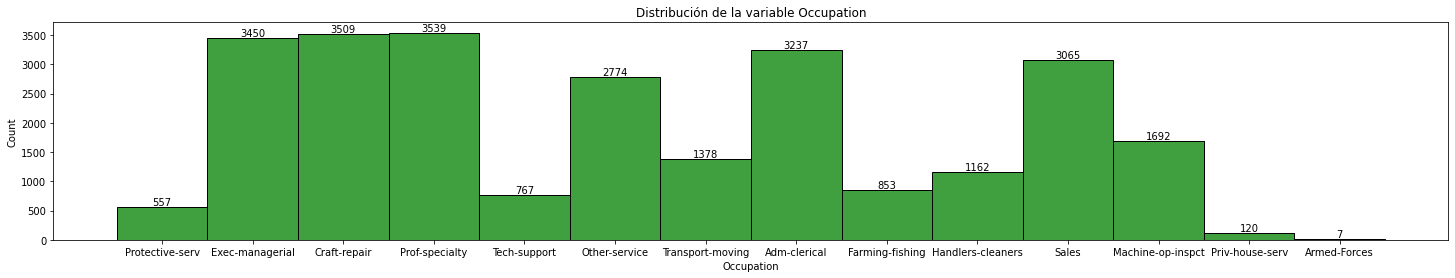

In [26]:
fig, ax = plt.subplots(figsize=(25,4))
y = sns.histplot(data=df.occupation, color = "green")
y.set(xlabel='Occupation')
y.bar_label(y.containers[0])
plt.title("Distribución de la variable Occupation")
plt.show()

In [27]:
imputer_mode.fit(df[['occupation']])


SimpleImputer(strategy='most_frequent')

In [28]:
df['occupation'] = imputer_mode.transform(df[['occupation']])

In [29]:
df

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID,income.num
0,24466,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,<=50K,24451,0
1,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,>50K,985,1
2,30250,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,>50K,30229,1
3,7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,7107,1
4,27656,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K,27639,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27651,29823,31,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K,29802,0
27652,5390,51,Private,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K,5390,1
27653,860,55,Federal-gov,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,1887,40,United-States,>50K,860,1
27654,15800,23,Private,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,25,United-States,<=50K,15795,0


###Native Country 🌍

In [30]:
df['native.country'].nunique()

41

In [31]:
df['native.country'].value_counts()

United-States                 24811
Mexico                          532
Philippines                     167
Germany                         108
Canada                           97
Puerto-Rico                      94
El-Salvador                      94
India                            84
England                          78
Cuba                             77
Jamaica                          72
China                            65
Dominican-Republic               64
South                            64
Italy                            61
Vietnam                          56
Japan                            56
Poland                           48
Columbia                         46
Guatemala                        44
Haiti                            41
Taiwan                           40
Iran                             38
Portugal                         35
Nicaragua                        32
Greece                           27
Ecuador                          25
Peru                        

In [32]:
imputer_mode.fit(df[['native.country']])
df['native.country'] = imputer_mode.transform(df[['native.country']])

✅ Ahora revisemos si tenemos Nans

In [33]:
df.isna().sum()

index             0
age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
ID                0
income.num        0
dtype: int64

In [34]:
df = df.rename(columns={"native.country":"country"})

###Education 👨‍🎓

In [35]:
df.education.nunique()

16

In [36]:
df.education.unique()

array(['HS-grad', 'Bachelors', 'Some-college', '7th-8th', 'Assoc-voc',
       'Masters', 'Assoc-acdm', '1st-4th', '5th-6th', 'Prof-school',
       '9th', '10th', '11th', '12th', 'Doctorate', 'Preschool'],
      dtype=object)

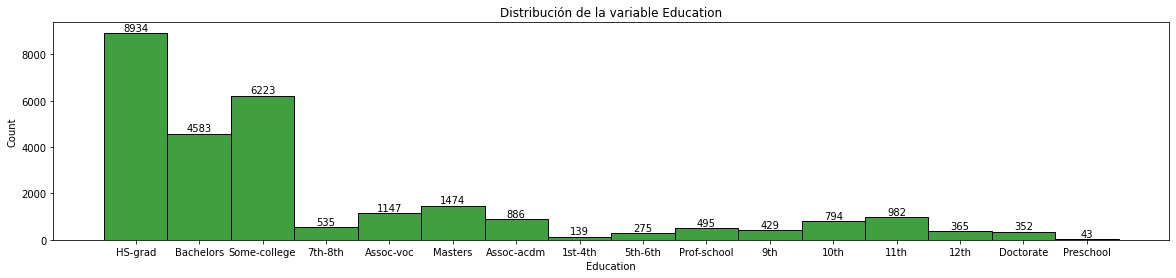

In [37]:
fig, ax = plt.subplots(figsize=(20,4))
y = sns.histplot(data=df.education, color = "green")
y.set(xlabel='Education')
y.bar_label(y.containers[0])
plt.title("Distribución de la variable Education")
plt.show()

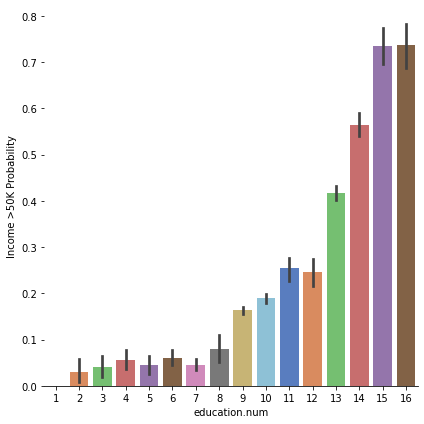

In [38]:
g = sns.catplot(x="education.num",y="income.num",data=df,kind="bar", height = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

In [39]:
df

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,country,income,ID,income.num
0,24466,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,<=50K,24451,0
1,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,>50K,985,1
2,30250,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,>50K,30229,1
3,7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,7107,1
4,27656,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K,27639,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27651,29823,31,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K,29802,0
27652,5390,51,Private,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K,5390,1
27653,860,55,Federal-gov,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,1887,40,United-States,>50K,860,1
27654,15800,23,Private,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,25,United-States,<=50K,15795,0


### Marital status 💍

In [40]:
df['marital.status'].unique()

array(['Divorced', 'Married-civ-spouse', 'Never-married', 'Widowed',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

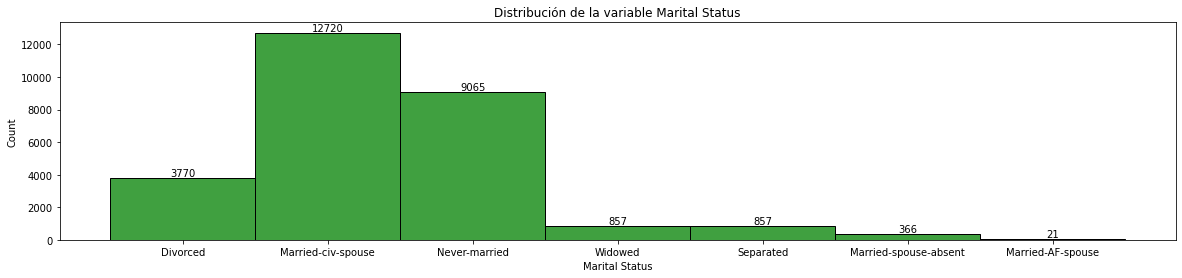

In [41]:
fig, ax = plt.subplots(figsize=(20,4))
y = sns.histplot(data=df['marital.status'], color = "green")
y.set(xlabel='Marital Status')
y.bar_label(y.containers[0])
plt.title("Distribución de la variable Marital Status")
plt.show()

In [42]:
df = df.rename(columns={"marital.status":"marital"})

###Relationship 👩‍👩‍👧‍👧

In [43]:
df['relationship'].unique()

array(['Own-child', 'Wife', 'Husband', 'Not-in-family', 'Unmarried',
       'Other-relative'], dtype=object)

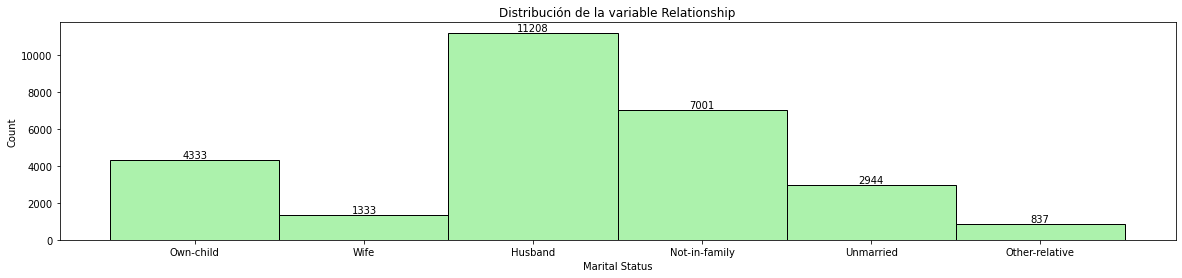

In [44]:
fig, ax = plt.subplots(figsize=(20,4))
y = sns.histplot(data=df['relationship'], color = "lightgreen")
y.set(xlabel='Marital Status')
y.bar_label(y.containers[0])
plt.title("Distribución de la variable Relationship")
plt.show()

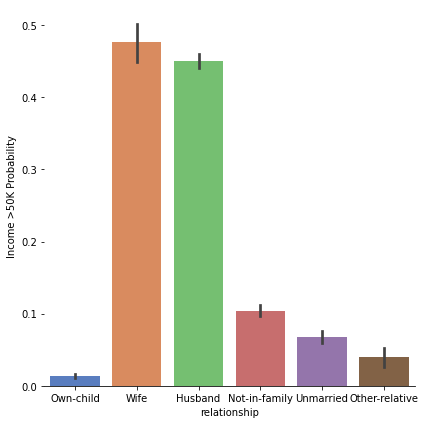

In [45]:
g = sns.catplot(x="relationship",y="income.num",data=df,kind="bar", height = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

###Race 🙍‍♀️🙍‍♂️

In [46]:
df.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [47]:
df.race.nunique()

5

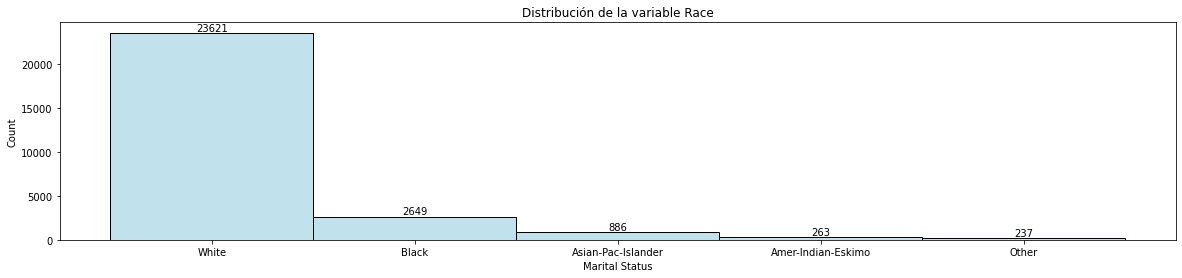

In [48]:
fig, ax = plt.subplots(figsize=(20,4))
y = sns.histplot(data=df['race'], color = "lightblue")
y.set(xlabel='Marital Status')
y.bar_label(y.containers[0])
plt.title("Distribución de la variable Race")
plt.show()

###Sex 🙍‍♀️🙍‍♂️

In [49]:
df.sex.value_counts()

Male      18521
Female     9135
Name: sex, dtype: int64

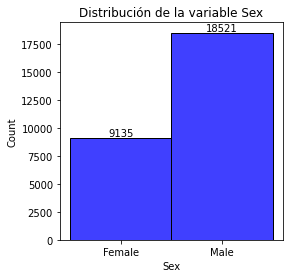

In [50]:
fig, ax = plt.subplots(figsize=(4,4))
y = sns.histplot(data=df['sex'], color = "blue")
y.set(xlabel='Sex')
y.bar_label(y.containers[0])
plt.title("Distribución de la variable Sex")
plt.show()

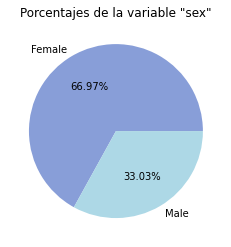

In [51]:
etiquetas = ['Female','Male']
valores = df['sex'].value_counts()
colores = ['#889ed8','lightblue']
 
plt.pie(x=valores, labels=etiquetas, colors = colores, autopct='%1.2f%%')
 
plt.title('Porcentajes de la variable "sex"')
 
plt.show()

###Correlación variables categóricas

In [52]:
categorical_cols = [cname for cname in df.columns if df[cname].dtype == "object"]
categorical_cols

['workclass',
 'education',
 'marital',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country',
 'income']

Utilizamos la funcion que permite calcular el coeficiente V de Cramér, el cual nos permite obtener una medida de asociación entre dos variables categóricas.

In [53]:
import scipy.stats as ss
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [54]:
import itertools
cols = categorical_cols
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
#     print(cols.index(col1),cols.index(col2))
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df[col1], df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]
    n = corrM.shape[0]
    corrM[range(n), range(n)] = 1

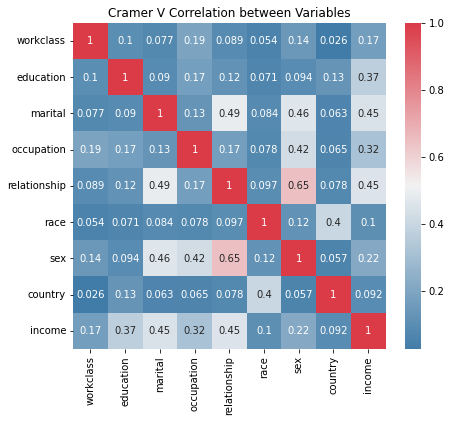

In [55]:
cmap = sns.diverging_palette(240, 10, as_cmap=True)

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax, cmap=cmap); ax.set_title("Cramer V Correlation between Variables");

**Las variables que más correlación tienen con income son Education, Marital, Occupation y Relationship**\

##Análisis Variables Numéricas

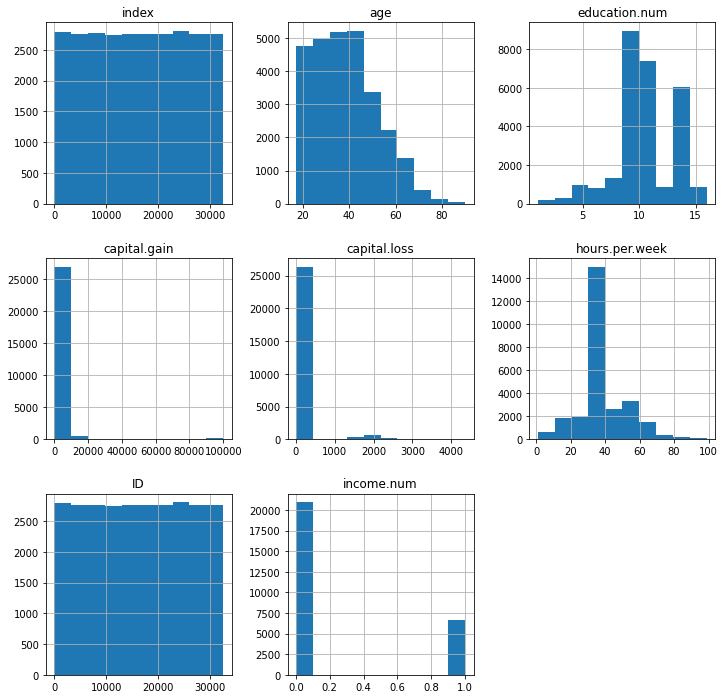

In [56]:
df.hist(figsize = (12,12), layout = (3,3), sharex = False);

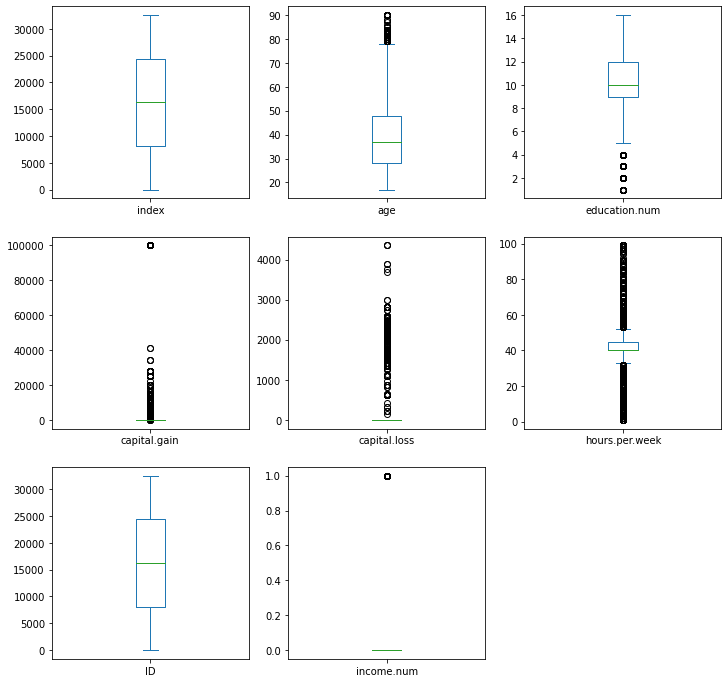

In [57]:
df.plot(kind = 'box', figsize = (12, 12), layout = (3, 3), sharex = False, subplots = True)
plt.title("Distribución de las variables numéricas Boxplot");

###Edad👨‍🦳

In [58]:
max_age = df["age"].max()

In [59]:
min_age = df["age"].min()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


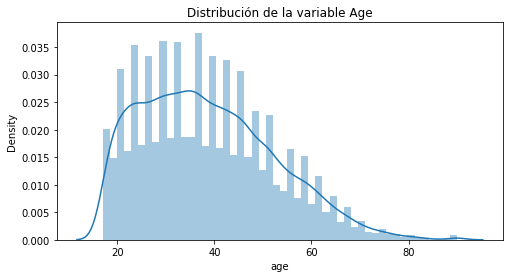

In [60]:
fig = plt.figure(figsize=(8,4))
sns.distplot(df.age)
plt.title("Distribución de la variable Age")

plt.show()

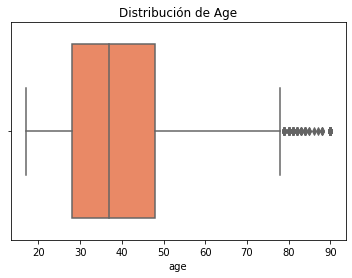

In [61]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df['age'], color="coral")
ax.set_title("Distribución de Age")
plt.show()

In [62]:
q3, q1= np. percentile(df.age, [75,25])
iqr = q3 - q1
iqr

20.0

In [63]:
min = q1 - 1.5*iqr
min

-2.0

In [64]:
max = q3 + 1.5*iqr
max

78.0

In [65]:
df_mask=(df['age']>max) | (df['age']<min) #identificacion de los outliers, se decide eliminar los registros por ser poca cantidad de registros
filtered_df = df[df_mask]
filtered_df.shape

(124, 17)

In [66]:
filtered_df

,index,age,workclass,education,education.num,marital,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,country,income,ID,income.num
122,31939,82,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,20,United-States,<=50K,31917,0
146,27498,84,Private,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,0,16,United-States,<=50K,27481,0
276,14659,90,Private,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,<=50K,14655,0
523,13046,80,Self-emp-not-inc,7th-8th,4,Widowed,Farming-fishing,Not-in-family,White,Male,0,0,35,United-States,<=50K,13043,0
677,21370,80,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,20,United-States,<=50K,21361,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26762,31904,80,Self-emp-not-inc,7th-8th,4,Never-married,Farming-fishing,Unmarried,White,Male,0,0,20,United-States,<=50K,31882,0
26914,8810,80,Private,Masters,14,Widowed,Prof-specialty,Not-in-family,White,Female,0,0,10,United-States,<=50K,8808,0
27396,20806,81,State-gov,1st-4th,2,Widowed,Other-service,Not-in-family,White,Female,0,0,20,United-States,<=50K,20797,0
27459,17874,84,Private,HS-grad,9,Widowed,Other-service,Not-in-family,White,Female,0,0,13,United-States,<=50K,17868,0


In [67]:
filas_a_eliminar = df[df['age']>max].index
df = df.drop(filas_a_eliminar)                          
               

In [68]:
filas_a_eliminar_2 = df[df['age']<min].index
df = df.drop(filas_a_eliminar_2)      

In [69]:
df.shape

(27532, 17)

###Horas🕗

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


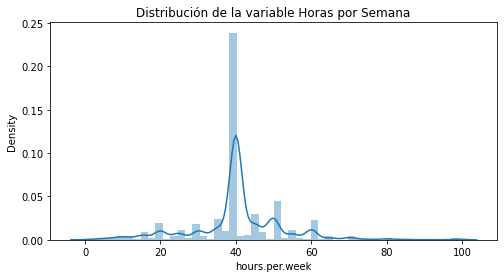

In [70]:
fig = plt.figure(figsize=(8,4))
sns.distplot(df["hours.per.week"])
plt.title("Distribución de la variable Horas por Semana")
plt.show()

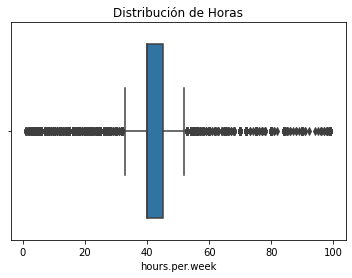

In [71]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df['hours.per.week'])
ax.set_title("Distribución de Horas")
plt.show()

In [72]:
q3, q1= np. percentile(df['hours.per.week'], [75,25])
iqr = q3 - q1
iqr

5.0

In [73]:
min = q1 - 1.5*iqr
min

32.5

In [74]:
max = q3 + 1.5*iqr
max

52.5

In [75]:
df_mask=(df['hours.per.week']>max) | (df['hours.per.week']<min) #identificacion de los outliers, se decide NO eliminar los registros por ser poca cantidad de registros
filtered_df = df[df_mask]
filtered_df.shape

(7577, 17)

###Capital Gain💵

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


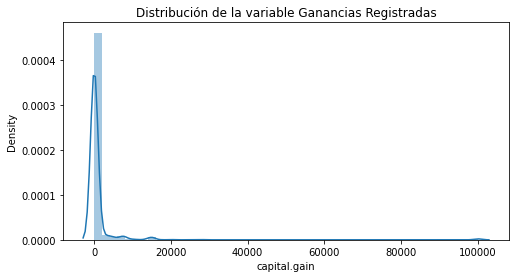

In [76]:
fig = plt.figure(figsize=(8,4))
sns.distplot(df["capital.gain"])
plt.title("Distribución de la variable Ganancias Registradas")
plt.show()  #distribución sesgada

###Capital Loss 💵

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


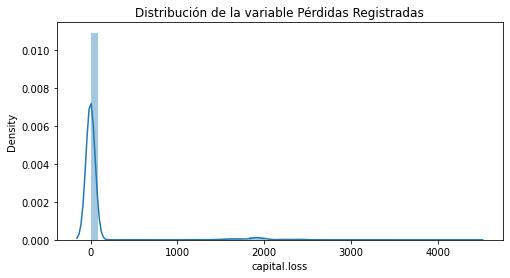

In [77]:
fig = plt.figure(figsize=(8,4))
sns.distplot(df["capital.loss"])
plt.title("Distribución de la variable Pérdidas Registradas")
plt.show() #distribución sesgada

####Correlación variables numéricas

In [78]:
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
numerical_cols

['index',
 'age',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'ID',
 'income.num']

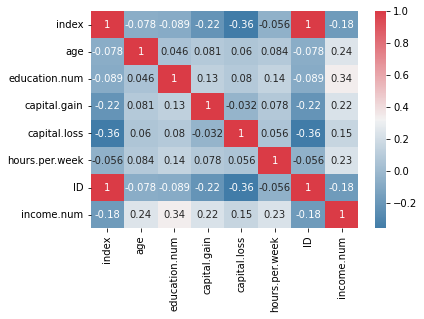

In [79]:
cmap = sns.diverging_palette(240, 10, as_cmap=True)

df_corr = df[numerical_cols].copy()
sns.heatmap(df_corr.corr(method='pearson'), cmap=cmap , annot=True)
plt.show()

**Las variables con mayor correlación con la variable objetivo son education.num, age, hours.per.week**

##Pre Processing

#### ✅ Reducción de los niveles de la variable Occupation

In [80]:
def new_occupation(row):
  occupation = row.occupation
  if occupation in ('Adm-clerical'):
    return 'Adm'
  
  if occupation in ("Craft-repair", "Transport-moving", "Farming-fishing", "Handlers-cleaners"):
    return 'Blue-Collar'
  
  if occupation in ("Armed-Forces"):
    return "Military"

  if occupation in ("Other-service"):
    return "Other-Occupations"
  
  if occupation in ("Prof-specialty"):
    return "Professional"
  
  if occupation in ("Exec-managerial"):
    return "White-Collar"

  if occupation in ("Protective-serv", "Tech-support", "Machine-op-inspct", "Priv-house-serv"):
    return "Service"

  return "Sales"

In [81]:
df['new_occupation'] = df.apply(new_occupation, axis=1)

####✅Reducción de los niveles de la variable Marital Status


In [82]:
def new_marital_status(row):
  marital = row.marital
  if marital in ("Married-civ-spouse", "Married-AF-spouse"):
    return 'casado'
  
  if marital in ("Divorced", "Separated", "Married-spouse-absent" ):
    return 'separado'
  
  if marital in ("Widowed"):
    return "viudo"
  
  return "soltero"

df['new_marital_status'] = df.apply(new_marital_status, axis=1)

####✅Reducción de los niveles de la variable Relationship

In [83]:
def new_relationship(row):
  relationship = row.relationship
  if relationship in ("Own-child", "Wife", "Husband"):
    return 'whit-family'
  
  if relationship in ("Not-in-family", "Unmarried", "Other-relative" ):
    return "whitout-family"
  
  return "whitout-family"

df['new_relationship'] = df.apply(new_relationship, axis=1)

####✅Reducción de los niveles de la variable Age

In [84]:
bins = [0, 25, 60, 75, 100]

In [85]:
names = ["joven", "adulto", "adulto_mayor", "jubilado"]

In [86]:
df["age"] = pd.cut(df["age"], bins, labels = names, include_lowest = True)

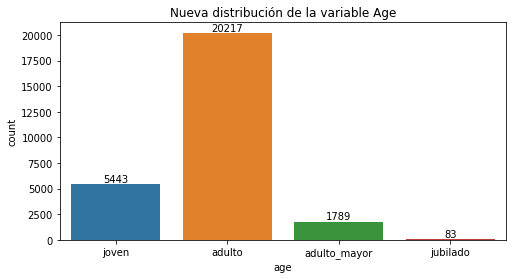

In [87]:
fig = plt.figure(figsize=(8,4))
age = sns.countplot(x="age", data = df)
age.bar_label(age.containers[0])
plt.title("Nueva distribución de la variable Age")
plt.show()

####✅Reducción de los niveles de la variable Hours per week

In [88]:
df["hours.per.week"].max()

99

In [89]:
bins_hs = [0, 20, 40, 60, 100]

In [90]:
names_hs = ["media_jornada", "jornada_completa", "jornada_extendida", "sin_descanso"]

In [91]:
df["hours.per.week"] = pd.cut(df["hours.per.week"], bins_hs, labels = names_hs, include_lowest = True)

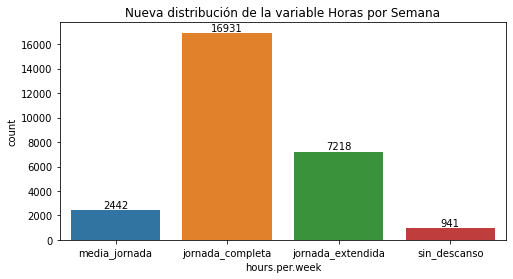

In [92]:
fig = plt.figure(figsize=(8,4))
hs = sns.countplot(x="hours.per.week", data = df)
hs.bar_label(hs.containers[0])
plt.title("Nueva distribución de la variable Horas por Semana")
plt.show()

###Visualizaciones

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27532 entries, 0 to 27655
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   index               27532 non-null  int64   
 1   age                 27532 non-null  category
 2   workclass           27532 non-null  object  
 3   education           27532 non-null  object  
 4   education.num       27532 non-null  int64   
 5   marital             27532 non-null  object  
 6   occupation          27532 non-null  object  
 7   relationship        27532 non-null  object  
 8   race                27532 non-null  object  
 9   sex                 27532 non-null  object  
 10  capital.gain        27532 non-null  int64   
 11  capital.loss        27532 non-null  int64   
 12  hours.per.week      27532 non-null  category
 13  country             27532 non-null  object  
 14  income              27532 non-null  object  
 15  ID                  27532 non-null  

####Ingresos por rango etario 📈

In [94]:
menos_50 = df['income.num'] == 0

In [95]:
menos_50.value_counts()

True     20852
False     6680
Name: income.num, dtype: int64

In [96]:
df_mask=df['income.num']== 0
menos_50 = df[df_mask]
result_menos50 = menos_50.groupby('age')['index'].nunique()
result_menos50

age
joven            5347
adulto          14081
adulto_mayor     1353
jubilado           71
Name: index, dtype: int64

In [97]:
df_mask2=df['income.num']== 1
mayor_50 = df[df_mask2]
result_mayor50 = mayor_50.groupby('age')['index'].nunique()
result_mayor50

age
joven             96
adulto          6136
adulto_mayor     436
jubilado          12
Name: index, dtype: int64

In [98]:
labels = ["joven", "adulto", "adulto_mayor", "jubilado"]

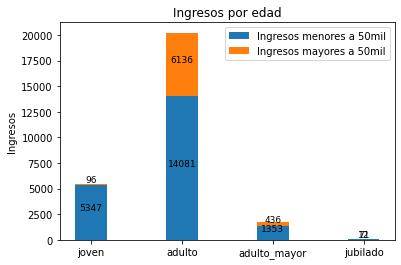

In [99]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax1 = ax.bar(labels, result_menos50, width, label='Ingresos menores a 50mil')
ax2 = ax.bar(labels, result_mayor50, width, bottom=result_menos50,
       label='Ingresos mayores a 50mil')

for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="bottom", color="black", fontsize=9)
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="bottom", color="black", fontsize=9)

ax.set_ylabel('Ingresos')
ax.set_title('Ingresos por edad')
ax.legend()

plt.show()

####Ingresos por nivel educativo 📈

In [100]:
education_menos50 = menos_50.groupby('education.num')['index'].nunique()
education_menos50.shape

(16,)

In [101]:
education_mayor50 = mayor_50.groupby('education.num')['index'].nunique()
education_mayor50

education.num
2        4
3       11
4       30
5       19
6       47
7       45
8       28
9     1454
10    1178
11     291
12     217
13    1911
14     827
15     361
16     257
Name: index, dtype: int64

In [102]:
education_mayor50['1'] = 0
education_mayor50.shape

(16,)

In [103]:
labels_2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

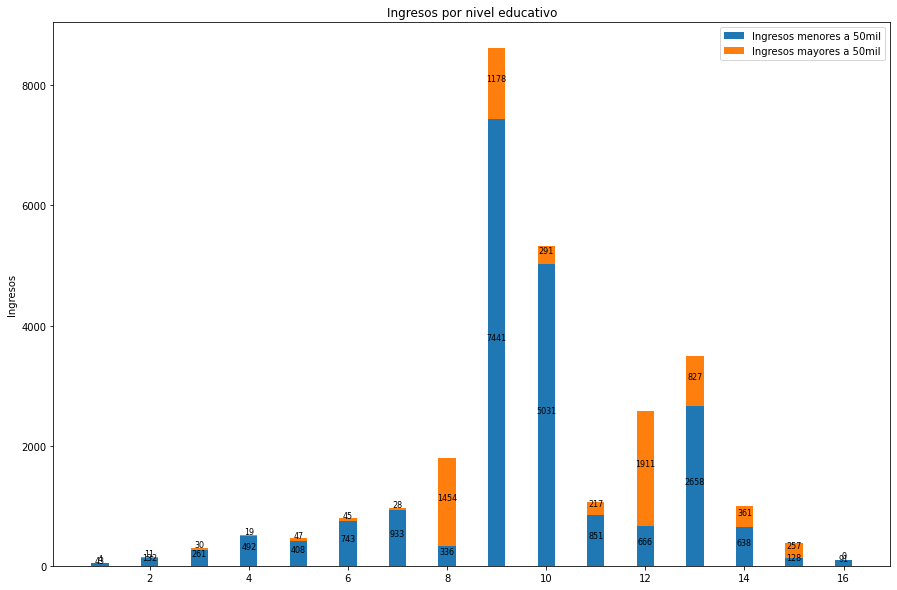

In [104]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(15, 10))

ax1 = ax.bar(labels_2, education_menos50, width, label='Ingresos menores a 50mil')
ax2 = ax.bar(labels_2, education_mayor50, width, bottom=education_menos50,
       label='Ingresos mayores a 50mil')

for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="bottom", color="black", fontsize=8)
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="bottom", color="black", fontsize=8)

ax.set_ylabel('Ingresos')
ax.set_title('Ingresos por nivel educativo')
ax.legend()


plt.show()

####Ingresos por sexo 📈

In [105]:
sex_menos50 = menos_50.groupby('sex')['index'].nunique()
sex_menos50

sex
Female     8087
Male      12765
Name: index, dtype: int64

In [106]:
sex_mayor50 = mayor_50.groupby('sex')['index'].nunique()
sex_mayor50

sex
Female    1011
Male      5669
Name: index, dtype: int64

In [107]:
labels_3 = ["Female", "Male"] 

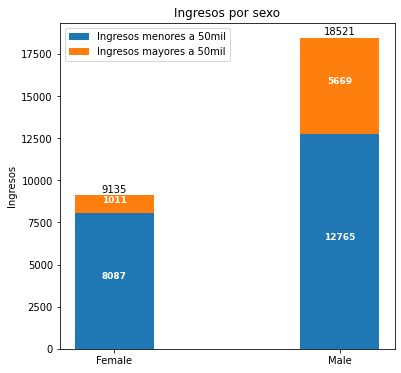

In [108]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(6, 6))

ax1 = ax.bar(labels_3,sex_menos50, width, label='Ingresos menores a 50mil')
ax2 = ax.bar(labels_3, sex_mayor50, width, bottom=sex_menos50,
       label='Ingresos mayores a 50mil')


total_column = ax.bar_label(y.containers[0],fmt='%g', label_type = 'edge')

for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="bottom", color="white", fontsize=9, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="bottom", color="white", fontsize=9, fontweight="bold")




#plt.xticks(fontsize=16)
#plt.yticks(fontsize=16)
ax.set_ylabel('Ingresos')
ax.set_title('Ingresos por sexo')
ax.legend()


plt.show()

####Ingresos por relationship 📈

In [109]:
rel_menos50 = menos_50.groupby('relationship')['index'].nunique()
rel_menos50

relationship
Husband           6117
Not-in-family     6233
Other-relative     802
Own-child         4269
Unmarried         2734
Wife               697
Name: index, dtype: int64

In [110]:
rel_mayor50 = mayor_50.groupby('relationship')['index'].nunique()
rel_mayor50

relationship
Husband           5036
Not-in-family      723
Other-relative      33
Own-child           58
Unmarried          198
Wife               632
Name: index, dtype: int64

In [111]:
labels_4 = df.relationship.unique()

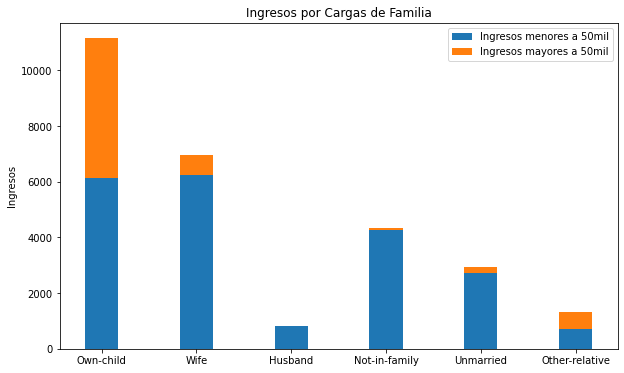

In [112]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(labels_4,rel_menos50, width, label='Ingresos menores a 50mil')
ax.bar(labels_4, rel_mayor50, width, bottom=rel_menos50,
       label='Ingresos mayores a 50mil')

ax.set_ylabel('Ingresos')
ax.set_title('Ingresos por Cargas de Familia')
ax.legend()


plt.show()

####Ingresos por hours per week 📈

In [113]:
hs_menos50 = menos_50.groupby('hours.per.week')['index'].nunique()
hs_menos50

hours.per.week
media_jornada         2275
jornada_completa     13712
jornada_extendida     4272
sin_descanso           593
Name: index, dtype: int64

In [114]:
hs_mayor50 = mayor_50.groupby('hours.per.week')['index'].nunique()
hs_mayor50

hours.per.week
media_jornada         167
jornada_completa     3219
jornada_extendida    2946
sin_descanso          348
Name: index, dtype: int64

In [115]:
labels_6 = ["media_jornada","jornada_completa","jornada_extendida","sin_descanso"]
labels_6

['media_jornada', 'jornada_completa', 'jornada_extendida', 'sin_descanso']

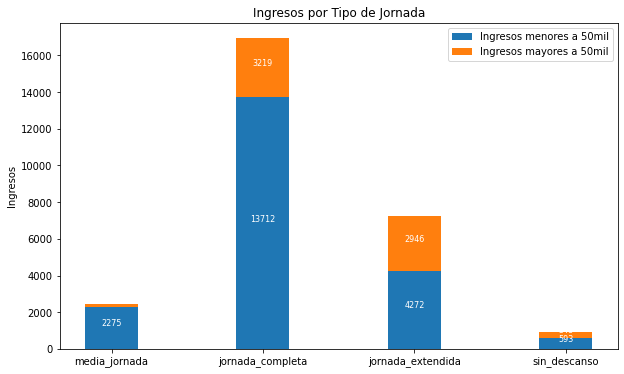

In [116]:
width = 0.35      

fig, ax = plt.subplots(figsize=(10, 6))

ax1 = ax.bar(labels_6,hs_menos50, width, label='Ingresos menores a 50mil')
ax2 = ax.bar(labels_6, hs_mayor50, width, bottom=hs_menos50, label='Ingresos mayores a 50mil')

for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="bottom", color="white", fontsize=8)
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="bottom", color="white", fontsize=8)

ax.set_ylabel('Ingresos')
ax.set_title('Ingresos por Tipo de Jornada')
ax.legend()


plt.show()

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27532 entries, 0 to 27655
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   index               27532 non-null  int64   
 1   age                 27532 non-null  category
 2   workclass           27532 non-null  object  
 3   education           27532 non-null  object  
 4   education.num       27532 non-null  int64   
 5   marital             27532 non-null  object  
 6   occupation          27532 non-null  object  
 7   relationship        27532 non-null  object  
 8   race                27532 non-null  object  
 9   sex                 27532 non-null  object  
 10  capital.gain        27532 non-null  int64   
 11  capital.loss        27532 non-null  int64   
 12  hours.per.week      27532 non-null  category
 13  country             27532 non-null  object  
 14  income              27532 non-null  object  
 15  ID                  27532 non-null  

###Eliminación de features que no serán utilizadas para el modelo

In [118]:
df.drop(columns=['index','workclass','education',
                 'occupation', 'marital', 'relationship', 'race', 'sex', 'income',
                 'country', 'ID', "capital.gain", 'capital.loss'], inplace = True)#no eliminé las columnas capital.gain y capital.loss, las reemplacé

In [119]:
df.info() #DataFrame limpio

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27532 entries, 0 to 27655
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 27532 non-null  category
 1   education.num       27532 non-null  int64   
 2   hours.per.week      27532 non-null  category
 3   income.num          27532 non-null  int64   
 4   new_occupation      27532 non-null  object  
 5   new_marital_status  27532 non-null  object  
 6   new_relationship    27532 non-null  object  
dtypes: category(2), int64(2), object(3)
memory usage: 2.3+ MB


###Conversión de todas las variables a variables binarias

In [120]:
df = pd.get_dummies(df, drop_first = True )

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27532 entries, 0 to 27655
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   education.num                     27532 non-null  int64
 1   income.num                        27532 non-null  int64
 2   age_adulto                        27532 non-null  uint8
 3   age_adulto_mayor                  27532 non-null  uint8
 4   age_jubilado                      27532 non-null  uint8
 5   hours.per.week_jornada_completa   27532 non-null  uint8
 6   hours.per.week_jornada_extendida  27532 non-null  uint8
 7   hours.per.week_sin_descanso       27532 non-null  uint8
 8   new_occupation_Blue-Collar        27532 non-null  uint8
 9   new_occupation_Military           27532 non-null  uint8
 10  new_occupation_Other-Occupations  27532 non-null  uint8
 11  new_occupation_Professional       27532 non-null  uint8
 12  new_occupation_Sales            

###Definimos X e Y

In [122]:
y=df['income.num'] #variable objetivo
y

0        0
1        1
2        1
3        1
4        0
        ..
27651    0
27652    1
27653    1
27654    0
27655    0
Name: income.num, Length: 27532, dtype: int64

In [123]:
X=df.drop(['income.num'], axis=1) #vector de entrada
X

,education.num,age_adulto,age_adulto_mayor,age_jubilado,hours.per.week_jornada_completa,hours.per.week_jornada_extendida,hours.per.week_sin_descanso,new_occupation_Blue-Collar,new_occupation_Military,new_occupation_Other-Occupations,new_occupation_Professional,new_occupation_Sales,new_occupation_Service,new_occupation_White-Collar,new_marital_status_separado,new_marital_status_soltero,new_marital_status_viudo,new_relationship_whitout-family
0,9,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
1,13,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,9,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,13,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,9,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27651,9,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
27652,11,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
27653,9,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
27654,13,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1


In [124]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27532 entries, 0 to 27655
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   education.num                     27532 non-null  int64
 1   age_adulto                        27532 non-null  uint8
 2   age_adulto_mayor                  27532 non-null  uint8
 3   age_jubilado                      27532 non-null  uint8
 4   hours.per.week_jornada_completa   27532 non-null  uint8
 5   hours.per.week_jornada_extendida  27532 non-null  uint8
 6   hours.per.week_sin_descanso       27532 non-null  uint8
 7   new_occupation_Blue-Collar        27532 non-null  uint8
 8   new_occupation_Military           27532 non-null  uint8
 9   new_occupation_Other-Occupations  27532 non-null  uint8
 10  new_occupation_Professional       27532 non-null  uint8
 11  new_occupation_Sales              27532 non-null  uint8
 12  new_occupation_Service          

### Train Test Split

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

##Definición de Modelos

### Decision Tree 

In [127]:
from sklearn.metrics import f1_score

In [128]:
from sklearn.tree import DecisionTreeClassifier

max_depths = np.arange(1, 15)
max_depths

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [129]:
train_fscores = []
test_fscores = []

In [130]:
for i in max_depths:
  tree = DecisionTreeClassifier(max_depth=i)

  tree.fit(X_train, y_train)
  train_preds = tree.predict(X_train)
  test_preds = tree.predict(X_test)

  train_fscores.append(f1_score(y_train, train_preds))
  test_fscores.append(f1_score(y_test, test_preds))

#####Cantidad óptima de Depth

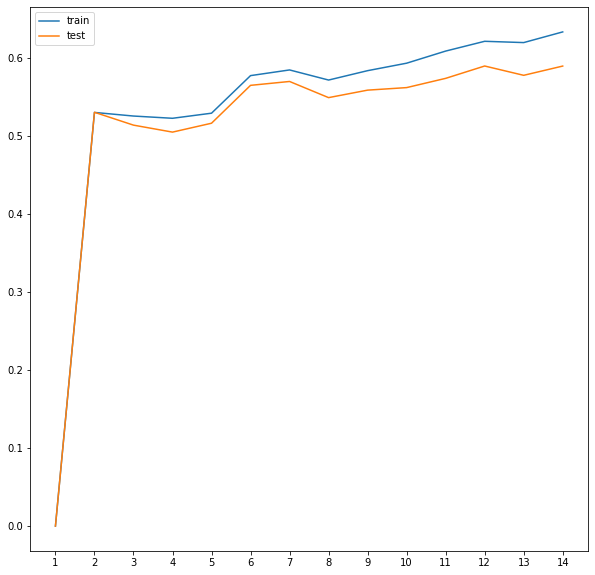

In [131]:
plt.figure(figsize=(10,10))

plt.plot(max_depths, train_fscores, label="train")
plt.plot(max_depths, test_fscores,  label="test")
plt.xticks(max_depths)
plt.legend()

In [132]:
tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [133]:
#Realizo las predicciones

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [134]:
#Evalúo su accuracy

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('Porcentaje de aciertos sobre el set de entrenamiento:', train_acc)
print('Porcentaje de aciertos sobre el set de evaluación:',test_acc)

Porcentaje de aciertos sobre el set de entrenamiento: 0.8271509648127128
Porcentaje de aciertos sobre el set de evaluación: 0.8176865807154531


###KNN Classifier

✅ Ahora vamos a entrenar un KNN Classifier y comparar los resultados con el árbol de decisión.

####Cantidad Óptima de Neighbors

In [135]:
K = np.arange(1,15)
train_scoresknn = []
test_scoresknn = []

for i in K:
  knn = KNeighborsClassifier(n_neighbors=i)

  knn.fit(X_train, y_train)
  train_preds_knn = knn.predict(X_train)
  test_preds_knn = knn.predict(X_test)

  train_scoresknn.append(f1_score(y_train, train_preds_knn))
  test_scoresknn.append(f1_score(y_test, test_preds_knn))

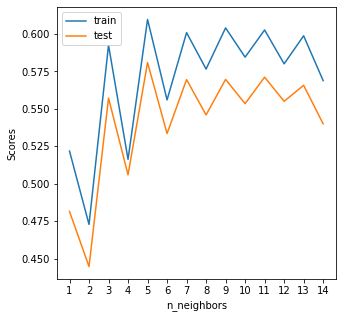

In [136]:
plt.figure(figsize=(5,5))

plt.plot(K, train_scoresknn, label="train")
plt.plot(K, test_scoresknn,  label="test")
plt.xlabel('n_neighbors')
plt.ylabel('Scores')
plt.xticks(max_depths)
plt.legend()

In [137]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [138]:
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

In [139]:
train_acc_knn = accuracy_score(y_train, y_train_pred_knn)
test_acc_knn = accuracy_score(y_test, y_test_pred_knn)

print('Porcentaje de aciertos sobre el set de entrenamiento:', train_acc_knn)
print('Porcentaje de aciertos sobre el set de evaluación:',test_acc_knn)

Porcentaje de aciertos sobre el set de entrenamiento: 0.8274233825198638
Porcentaje de aciertos sobre el set de evaluación: 0.8091519883784275


###Random Forest

In [140]:
from sklearn.ensemble import RandomForestClassifier

rfc =RandomForestClassifier()

model1 = rfc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

print("Porcentaje de aciertos sobre el set de entrenamiento: {:,.3f}".format(rfc.score(X_train, y_train)))
print("Porcentaje de aciertos sobre el set de evaluación: {:,.3f}".format(rfc.score(X_test, y_test)))

Porcentaje de aciertos sobre el set de entrenamiento: 0.842
Porcentaje de aciertos sobre el set de evaluación: 0.815


##Matriz de Confusión

In [141]:
from sklearn.metrics import confusion_matrix

In [142]:
from sklearn.metrics import plot_confusion_matrix

###Decision Tree

In [143]:
confusion_matrix(y_test, y_test_pred)

array([[3850,  321],
       [ 683,  653]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


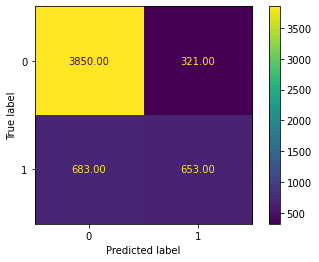

In [144]:
tree = DecisionTreeClassifier(max_depth=6)

tree.fit(X_train, y_train)

plot_confusion_matrix(tree, X_test, y_test, values_format = '.2f')

plt.show()

In [145]:
precision_tree = 257/(257+4)
precision_tree

0.9846743295019157

###KNN Classifier

In [146]:
confusion_matrix(y_test, y_test_pred_knn)

array([[3756,  415],
       [ 636,  700]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


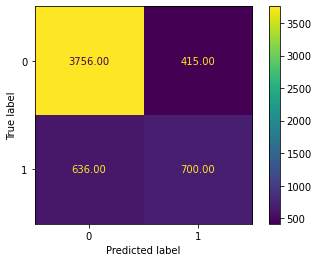

In [147]:
knn_clas = KNeighborsClassifier(n_neighbors=9)

knn_clas.fit(X_train, y_train)

plot_confusion_matrix(knn, X_test, y_test, values_format = '.2f')

plt.show()

###Random Forest

In [148]:
confusion_matrix(y_test, prediction1)

array([[3748,  423],
       [ 597,  739]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


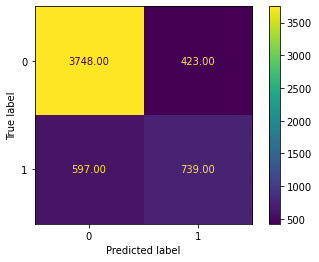

In [149]:
rand_forest = RandomForestClassifier()

rand_forest.fit(X_train, y_train)

plot_confusion_matrix(rfc, X_test, y_test, values_format = '.2f')

plt.show()

##Reporte de Clasificación

In [150]:
from sklearn.metrics import classification_report

In [151]:
print(classification_report(y_test, y_test_pred)) #Decision Tree

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4171
           1       0.67      0.49      0.57      1336

    accuracy                           0.82      5507
   macro avg       0.76      0.71      0.73      5507
weighted avg       0.81      0.82      0.81      5507



In [152]:
print(classification_report(y_test, y_test_pred_knn)) #KNN Classifier

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4171
           1       0.63      0.52      0.57      1336

    accuracy                           0.81      5507
   macro avg       0.74      0.71      0.72      5507
weighted avg       0.80      0.81      0.80      5507



In [153]:
print(classification_report(y_test, prediction1 )) #Random Forest

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4171
           1       0.64      0.55      0.59      1336

    accuracy                           0.81      5507
   macro avg       0.75      0.73      0.74      5507
weighted avg       0.81      0.81      0.81      5507



##Predicción sobre Test

In [154]:
df_test = pd.read_csv('/content/drive/MyDrive/Data Science - Icaro/Sprints/test.csv', na_values = ('?','')) #para discriminar los valores nulos

In [155]:
df_test

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,ID
0,3643,53,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3137,0,40,United-States,3643
1,16041,18,NaN,11th,7,Never-married,NaN,Own-child,White,Male,0,0,25,United-States,16036
2,9403,42,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,37,United-States,9401
3,17909,49,Self-emp-inc,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,60,United-States,17903
4,5198,58,Local-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,5198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4876,19475,50,Private,HS-grad,9,Divorced,Craft-repair,Unmarried,White,Female,0,0,40,United-States,19468
4877,7554,43,State-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,7554
4878,25091,71,Private,Assoc-voc,11,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,25076
4879,9733,20,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,Yugoslavia,9731


In [156]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           4881 non-null   int64 
 1   age             4881 non-null   int64 
 2   workclass       4584 non-null   object
 3   education       4881 non-null   object
 4   education.num   4881 non-null   int64 
 5   marital.status  4881 non-null   object
 6   occupation      4584 non-null   object
 7   relationship    4881 non-null   object
 8   race            4881 non-null   object
 9   sex             4881 non-null   object
 10  capital.gain    4881 non-null   int64 
 11  capital.loss    4881 non-null   int64 
 12  hours.per.week  4881 non-null   int64 
 13  native.country  4803 non-null   object
 14  ID              4881 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 572.1+ KB


In [157]:
#workclass, occupation, native.county reemplazamos nulos por la moda
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imputer_mode.fit(df_test[['workclass']])
df_test['workclass'] = imputer_mode.transform(df_test[['workclass']])

#Occupation
imputer_mode.fit(df_test[['occupation']])
df_test['occupation'] = imputer_mode.transform(df_test[['occupation']])

#Reducción de valores de occupation
df_test['new_occupation'] = df_test.apply(new_occupation, axis=1)

#Reducción de valores de relationship
df_test['new_relationship'] = df_test.apply(new_relationship, axis=1)

#native.country
imputer_mode.fit(df_test[['native.country']])
df_test['native.country'] = imputer_mode.transform(df_test[['native.country']])

df_test = df_test.rename(columns={"native.country":"country"})

#Renombro columna marital
df_test = df_test.rename(columns={"marital.status":"marital"})

#Reducción de valores marital status
df_test['new_marital_status'] = df_test.apply(new_marital_status, axis=1)

#Reduccion de valores edad
bins = [0, 25, 60, 75, 100]
names = ["joven", "adulto", "adulto_mayor", "jubilado"]
df_test["age"] = pd.cut(df_test["age"], bins, labels = names, include_lowest = True)

#Reduccion de valores hours per week

bins_hs = [0, 20, 40, 60, 100]
names_hs = ["media_jornada", "jornada_completa", "jornada_extendida", "sin_descanso"]
df_test["hours.per.week"] = pd.cut(df_test["hours.per.week"], bins_hs, labels = names_hs, include_lowest = True)





In [158]:
#Eliminamos columnas que no serán utilizadas
df_test.drop(columns=['index','workclass','education',
                 'occupation', 'marital', 'relationship', 'race', 'sex',
                 'country', 'ID', "capital.gain", 'capital.loss'], inplace = True)



df_test = pd.get_dummies(df_test, drop_first = True )

In [159]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   education.num                     4881 non-null   int64
 1   age_adulto                        4881 non-null   uint8
 2   age_adulto_mayor                  4881 non-null   uint8
 3   age_jubilado                      4881 non-null   uint8
 4   hours.per.week_jornada_completa   4881 non-null   uint8
 5   hours.per.week_jornada_extendida  4881 non-null   uint8
 6   hours.per.week_sin_descanso       4881 non-null   uint8
 7   new_occupation_Blue-Collar        4881 non-null   uint8
 8   new_occupation_Military           4881 non-null   uint8
 9   new_occupation_Other-Occupations  4881 non-null   uint8
 10  new_occupation_Professional       4881 non-null   uint8
 11  new_occupation_Sales              4881 non-null   uint8
 12  new_occupation_Service            

In [160]:
X_dftest=df_test

####Decision Tree

In [161]:
y_test_pred_DFTEST = tree.predict(X_dftest)
y_test_pred_DFTEST

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([0, 0, 0, ..., 0, 0, 0])

####KNN

In [162]:
y_test_pred_knn_DFTEST = knn.predict(X_dftest)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


####Random Forest

In [163]:
prediction1_DFTEST = model1.predict(X_dftest)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


##Dataframe de predicciones usando el modelo DecisionTree, ya que arroja las mejores métricas

In [164]:
prediccion = y_test_pred_DFTEST 

In [165]:
df_prediccion = pd.DataFrame(data = prediccion,  columns = ['income'], copy = True )
df_prediccion

,income
0,0
1,0
2,0
3,1
4,1
...,...
4876,0
4877,1
4878,0
4879,0


In [166]:
df_prediccion["income"].value_counts()

0    3747
1    1134
Name: income, dtype: int64

##GridSearchCV

**Para mejorar el modelo, vamos a hacer una búsqueda exhaustiva de hiperparámetros utilizando grid search.**

In [168]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [169]:
from sklearn.ensemble import RandomForestClassifier 

In [171]:
model = RandomForestClassifier()

In [172]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [173]:
parameters={'max_depth': [2,3,4,5,6,7,8,9,10,20,30],
            'n_estimators': [2,10,50,100,150,200],
            'random_state': [2,3,4,5,6,7,8,9,10]}

In [174]:
parameters_2={'max_depth': [5,8,9,10,11,12,15],
            'n_estimators': [2,10,50,100,150,200],
            'random_state': [2,3,4,5,6,7,8,9,10]}

In [175]:
clf = GridSearchCV(RandomForestClassifier() ,parameters_2)
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 8, 9, 10, 11, 12, 15],
                         'n_estimators': [2, 10, 50, 100, 150, 200],
                         'random_state': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [176]:
clf.best_params_ #mejores parámetros

{'max_depth': 8, 'n_estimators': 200, 'random_state': 8}

In [178]:
clf = RandomForestClassifier(max_depth=8, n_estimators = 200, n_jobs = -1, random_state=8)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, n_jobs=-1, random_state=8)

In [179]:
fi = pd.DataFrame(columns=["FEATURE", "IMPORTANCE"]) #creo un df llamado fi
fi["FEATURE"] = X_train.columns
fi["IMPORTANCE"] = clf.feature_importances_
fi = fi.sort_values("IMPORTANCE", ascending=False)
fi

,FEATURE,IMPORTANCE
0,education.num,0.280174
15,new_marital_status_soltero,0.215436
17,new_relationship_whitout-family,0.162095
1,age_adulto,0.077028
14,new_marital_status_separado,0.066122
5,hours.per.week_jornada_extendida,0.048539
13,new_occupation_White-Collar,0.044203
7,new_occupation_Blue-Collar,0.021262
9,new_occupation_Other-Occupations,0.018403
4,hours.per.week_jornada_completa,0.016450


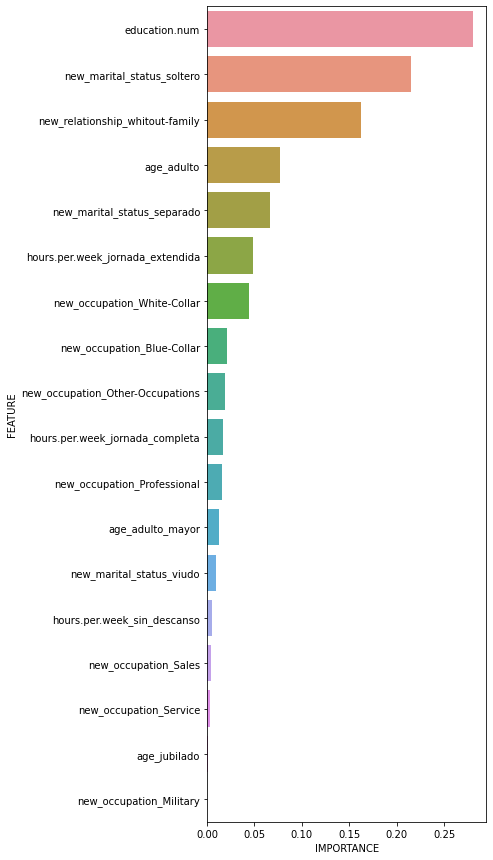

In [180]:
plt.figure(figsize=(5, 15))
sns.barplot(y=fi.FEATURE, x=fi.IMPORTANCE)
plt.show()

##RandomizedSearchCV: búsqueda aleatoria

In [181]:
clf = RandomizedSearchCV(RandomForestClassifier() ,parameters)
clf.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 20, 30],
                                        'n_estimators': [2, 10, 50, 100, 150,
                                                         200],
                                        'random_state': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10]})

In [182]:
clf.best_params_

{'max_depth': 7, 'n_estimators': 150, 'random_state': 9}